Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.


Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.


Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.


Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.


Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.


Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.


Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.


### **DataSet**

1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.notnull().sum()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

**Not null**

In [5]:
col = ['Outcome','Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
col

['Outcome',
 'Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

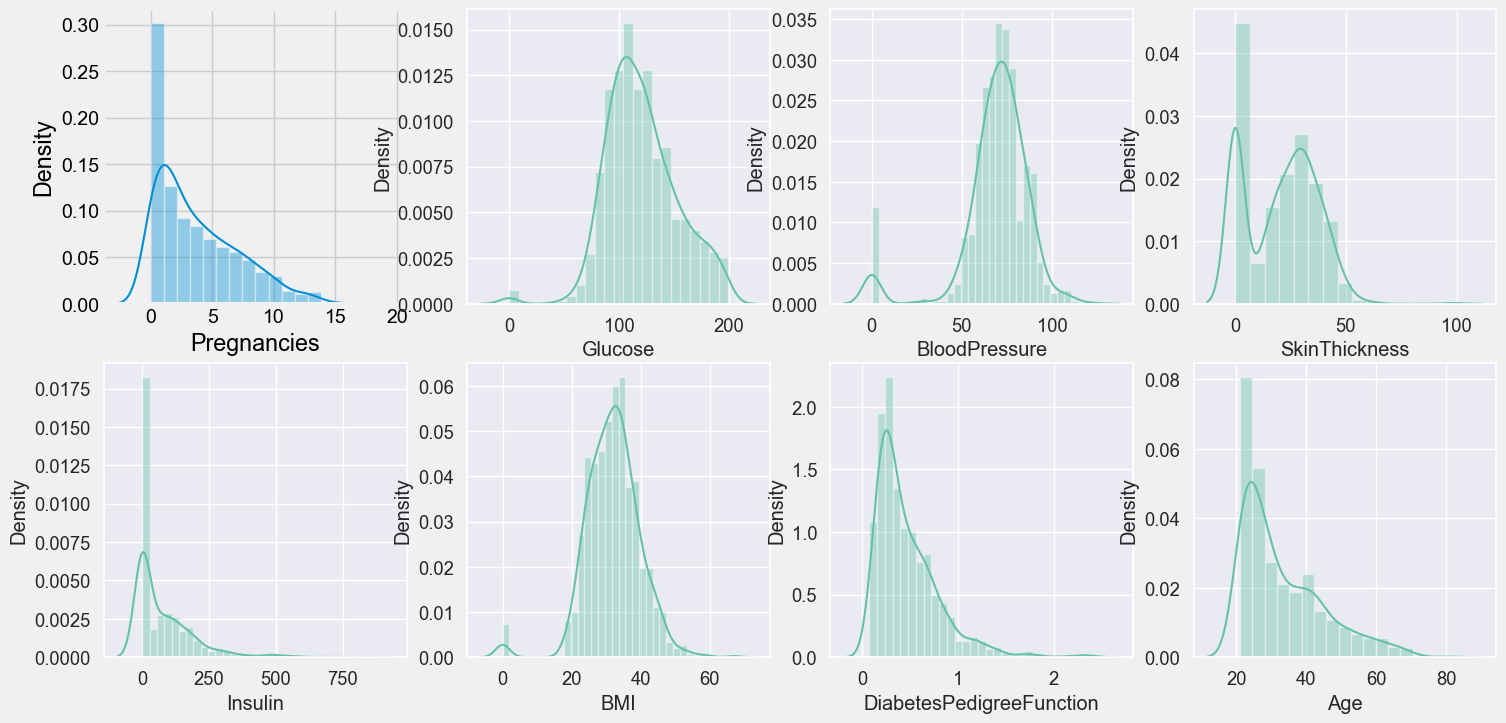

In [6]:
plt.figure(figsize=(16,8))
for i in range(1,9):
    plt.subplot(2,4,i)
    sns.set_theme(style='darkgrid', palette='Set2', font_scale=1.2)
    sns.distplot(df[col[i]])
    
plt.show()

In [7]:
# check skew
for i in range(1,9):
    print(f"{col[i]}: ",df[col[i]].skew() )

Pregnancies:  0.9016739791518588
Glucose:  0.17375350179188992
BloodPressure:  -1.8436079833551302
SkinThickness:  0.10937249648187608
Insulin:  2.272250858431574
BMI:  -0.42898158845356543
DiabetesPedigreeFunction:  1.919911066307204
Age:  1.1295967011444805


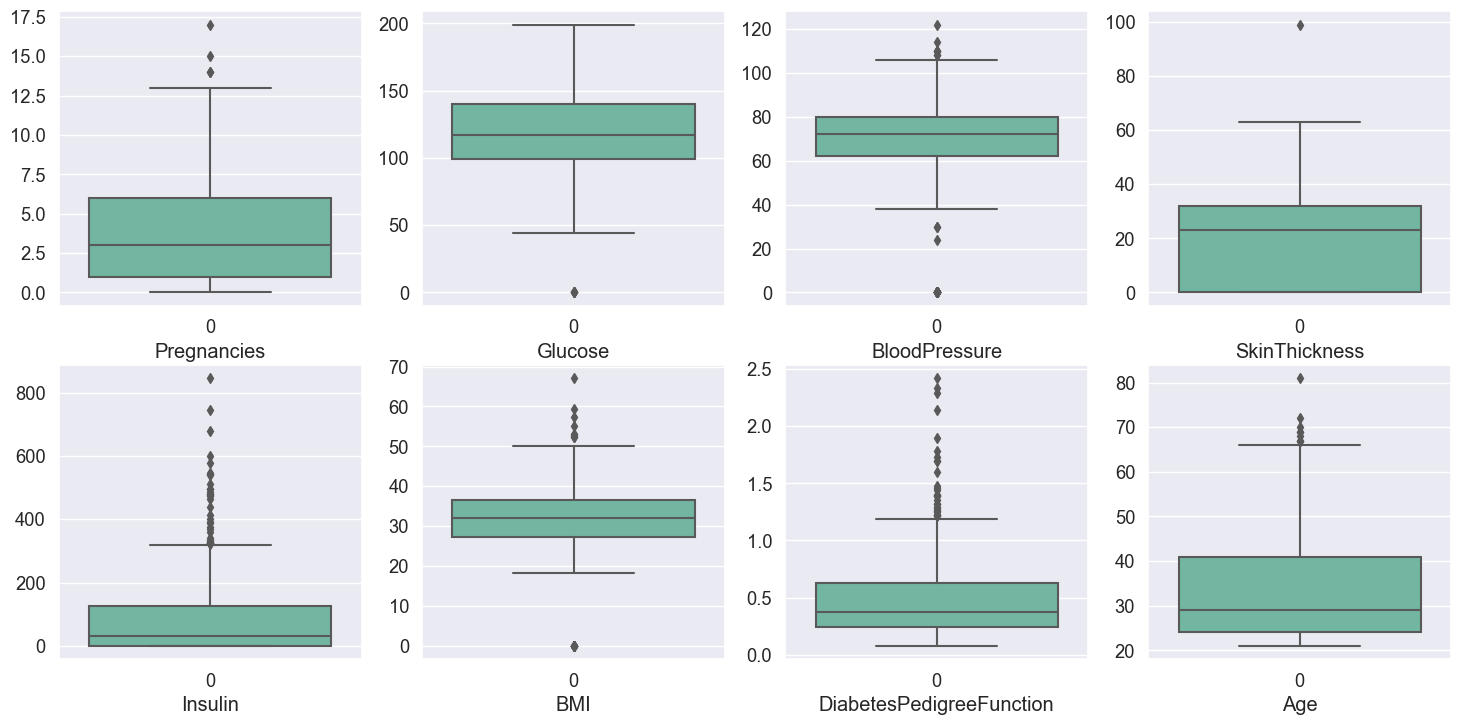

In [8]:
# check outlier
plt.figure(figsize=(16,8))
for i in range(1,9):
    plt.subplot(2,4,i)
    sns.set_theme(style='darkgrid', palette='Set2', font_scale=1.2)
    sns.boxplot(df[col[i]])
    plt.xlabel(col[i])
    
plt.show()

**Outlier** : Pregnancies, Bloodpressure, SkinThickness, insulin, BMI, DiabetesPredigreeFunction, Age, Glucose

In [9]:
df_new = df.copy()

In [10]:
df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [11]:
print("Highest allowed: ", df['Glucose'].mean() + 3*df['Glucose'].std())
print("lower allowed: ", df['Glucose'].mean() - 3*df['Glucose'].std())

Highest allowed:  216.81238583540866
lower allowed:  24.976676664591338


In [12]:
df[(df['Glucose'] > 216.81) | (df['Glucose'] < 24.97)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [13]:
upper_limit = df['Glucose'].mean() + 3*df['Glucose'].std()
lower_limit = df['Glucose'].mean() - 3*df['Glucose'].std()
print("upper limit", upper_limit)
print("lower_limit", lower_limit)

upper limit 216.81238583540866
lower_limit 24.976676664591338


In [14]:
df_new['Glucose'] = np.where(
    df_new['Glucose']>upper_limit,
    upper_limit,
    np.where(
        df_new['Glucose'] < lower_limit,
        24.976678,
        df_new['Glucose']
    )
)

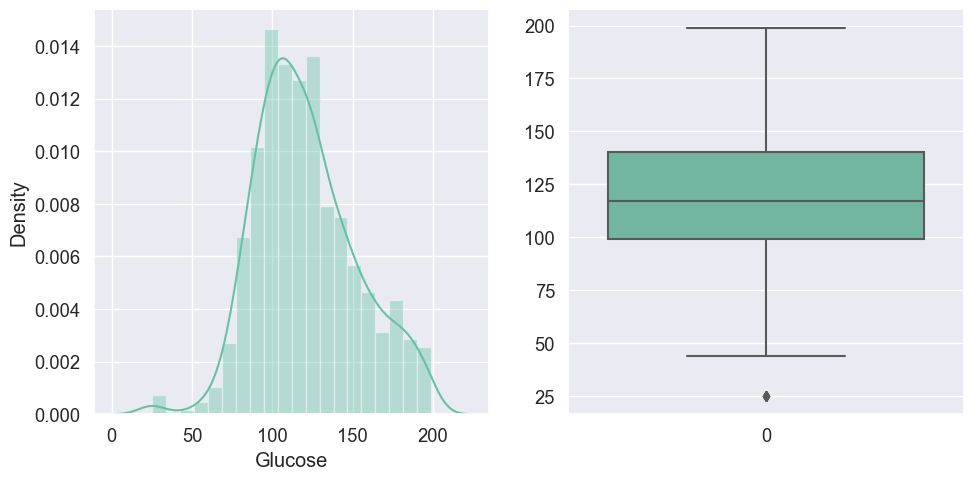

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_new['Glucose'])

plt.subplot(1,2,2)
sns.boxplot(df_new['Glucose'])

plt.show()

In [16]:
df[df['Glucose'] < 50]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
62,5,44,62,0,0,25.0,0.587,36,0
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [17]:
# outlier for pregnancies
df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [18]:
percentile25 = df['Pregnancies'].quantile(0.25)
percentile75 = df['Pregnancies'].quantile(0.75)

print(percentile25)
print(percentile75)

1.0
6.0


In [19]:
iqr = percentile75 - percentile25
iqr

5.0

In [20]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

print("upper limit",upper_limit)
print("lower limit",lower_limit)

upper limit 13.5
lower limit -6.5


In [21]:
df[df['Pregnancies'] > upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [22]:
df[df['Pregnancies'] < lower_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [23]:
df_new['Pregnancies'] = np.where(
    df_new['Pregnancies']>upper_limit,
    upper_limit,
    np.where(
        df_new['Pregnancies']<lower_limit,
        lower_limit,
        df_new['Pregnancies']
    )
)

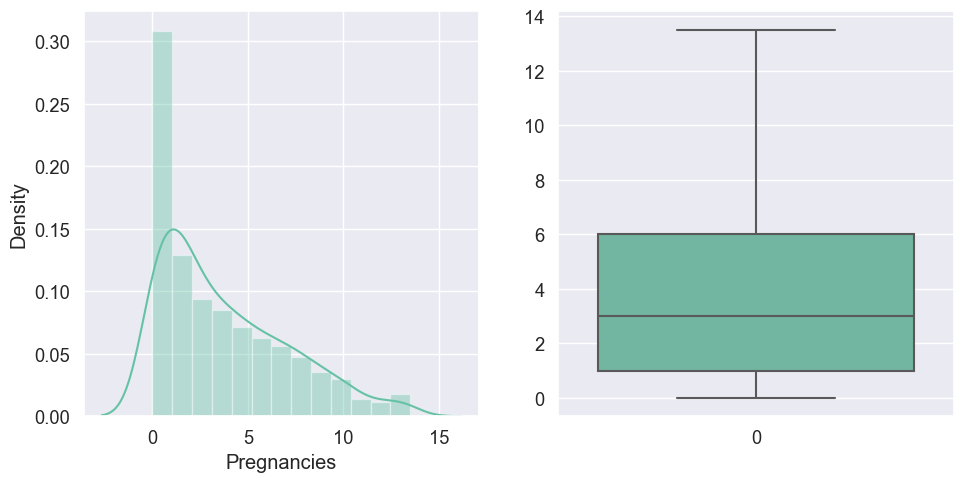

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_new['Pregnancies'])

plt.subplot(1,2,2)
sns.boxplot(df_new['Pregnancies'])

plt.show()

In [25]:
print("Highest allowed: ", df['BloodPressure'].mean() + 3*df['BloodPressure'].std())
print("lower allowed: ", df['BloodPressure'].mean() - 3*df['BloodPressure'].std())

Highest allowed:  127.17289026193433
lower allowed:  11.038047238065673


In [26]:
percentile25 = df['BloodPressure'].quantile(0.25)
percentile75 = df['BloodPressure'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

print("upper limit",upper_limit)
print("lower limit",lower_limit)

upper limit 107.0
lower limit 35.0


In [27]:
df_new['BloodPressure'] = np.where(
    df_new['BloodPressure']>upper_limit,
    upper_limit,
    np.where(
        df_new['BloodPressure']<lower_limit,
        lower_limit,
        df_new['BloodPressure']
    )
)

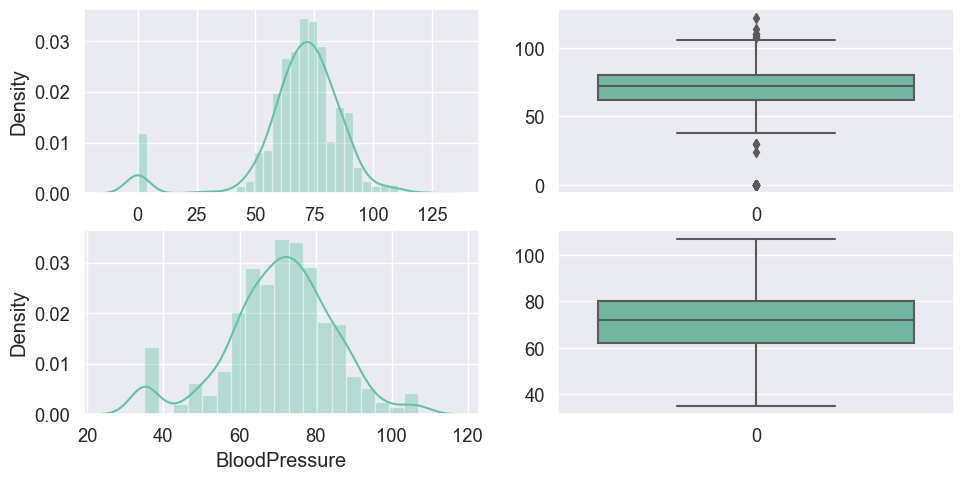

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(df['BloodPressure'])

plt.subplot(2,2,2)
sns.boxplot(df['BloodPressure'])

plt.subplot(2,2,3)
sns.distplot(df_new['BloodPressure'])

plt.subplot(2,2,4)
sns.boxplot(df_new['BloodPressure'])

plt.show()

In [29]:
outlier = ['Insulin', 'DiabetesPedigreeFunction','Age']

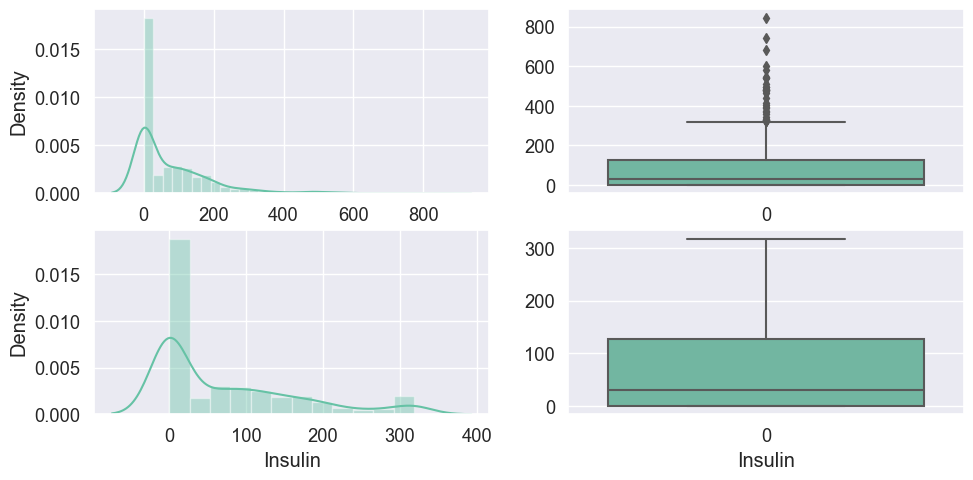

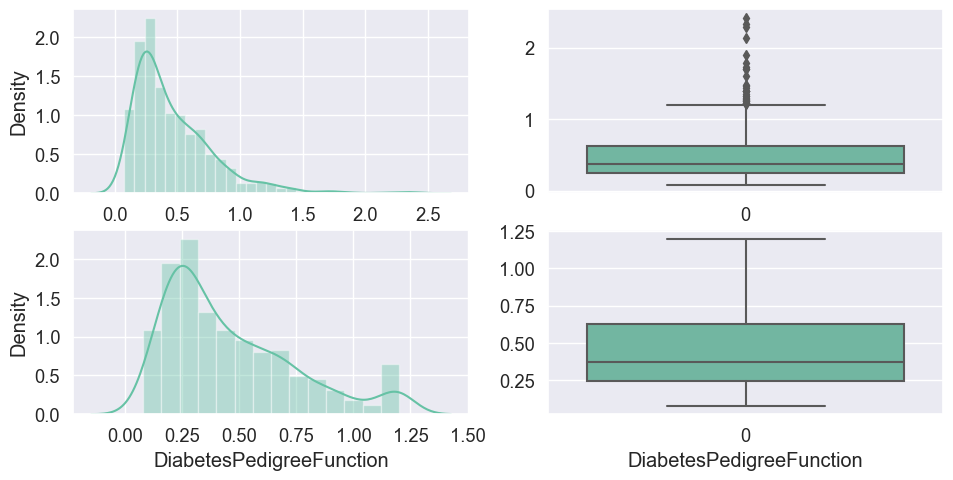

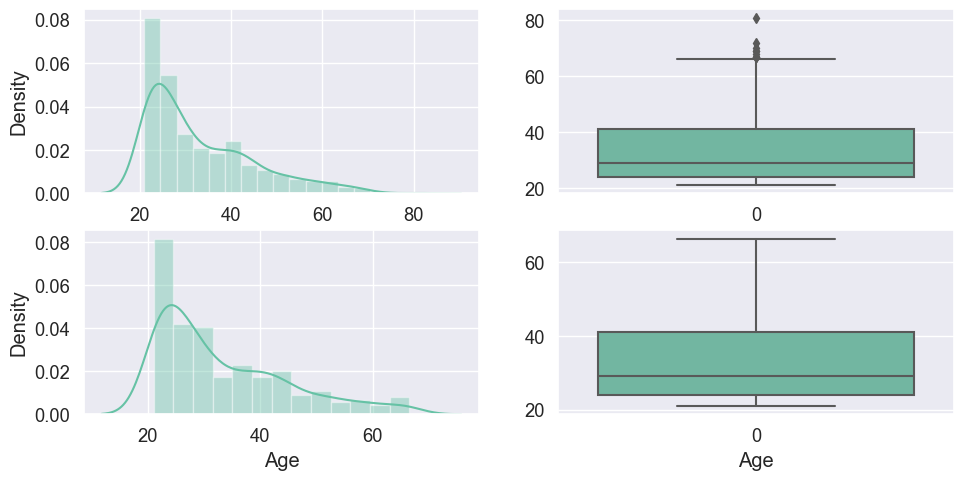

In [30]:
for i in outlier :    
    percentile25 = df[i].quantile(0.25)
    percentile75 = df[i].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5*iqr
    lower_limit = percentile25 - 1.5*iqr

    df_new[i] = np.where(
        df_new[i]>upper_limit,
        upper_limit,
        np.where(
            df_new[i]<lower_limit,
            lower_limit,
            df_new[i]
        )
    )

    plt.figure(figsize=(10,5))
    plt.subplot(2,2,1)
    sns.distplot(df[i])

    plt.subplot(2,2,2)
    sns.boxplot(df[i])

    plt.subplot(2,2,3)
    sns.distplot(df_new[i])
    plt.xlabel(f'{i}')

    plt.subplot(2,2,4)
    sns.boxplot(df_new[i])
    plt.xlabel(f'{i}')
    plt.show()

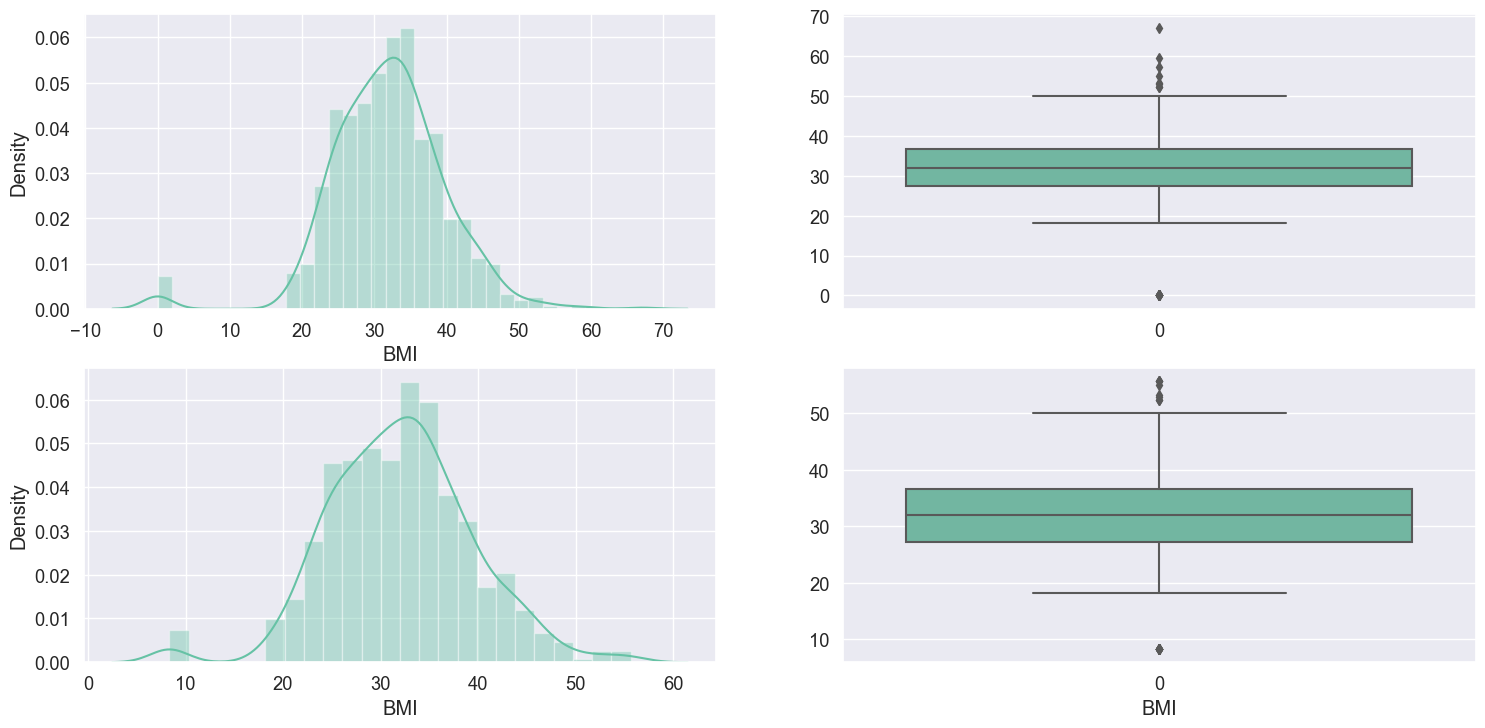

In [31]:
upper_limit = df['BMI'].mean() + 3*df['BMI'].std()
lower_limit = df['BMI'].mean() - 3*df['BMI'].std()

df_new['BMI'] = np.where(
    df_new['BMI']>upper_limit,
    upper_limit,
    np.where(
        df_new['BMI'] < lower_limit,
        lower_limit,
        df_new['BMI']
    )
)

plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(df['BMI'])

plt.subplot(2,2,2)
sns.boxplot(df['BMI'])

plt.subplot(2,2,3)
sns.distplot(df_new['BMI'])
plt.xlabel('BMI')

plt.subplot(2,2,4)
sns.boxplot(df_new['BMI'])
plt.xlabel('BMI')

plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new.iloc[:,0:9], df_new.iloc[:,-1],test_size=0.2, random_state=2)

In [33]:
print("X_train",X_train.shape)
print("y train",y_train.shape)

X_train (614, 9)
y train (614,)


In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [35]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt = DecisionTreeClassifier()

In [36]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
y_pred = dt.predict(X_test)

In [38]:
list(df_new.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

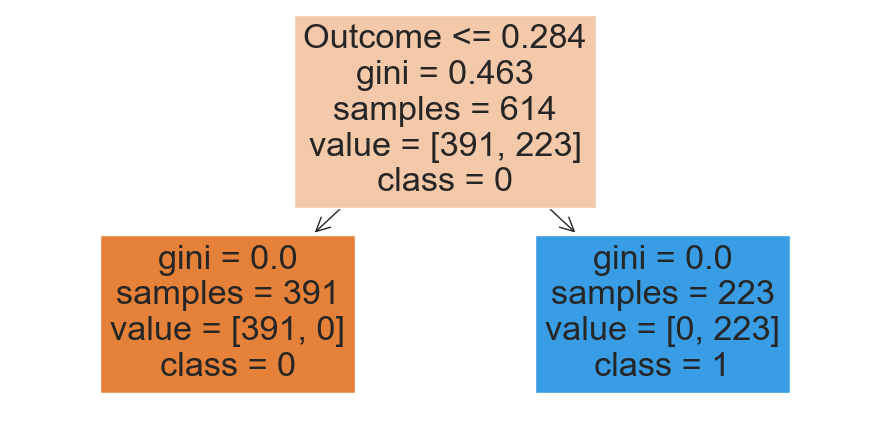

In [39]:
plt.figure(figsize=(10, 5))
plot_tree(dt, filled=True,feature_names=list(df_new.columns), class_names= list(["0","1"]))
plt.show()

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy matrix", accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

accuracy matrix 1.0


array([[109,   0],
       [  0,  45]], dtype=int64)